## should learn
### 1.correlation for categorical_variables (correlation_ratio,crammers_v)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [145]:
test_data=pd.read_csv('test_2umaH9m.csv') #test_data_set
ss=pd.read_csv('sample_submission_M0L0uXE.csv') #submission_sample_data_set

In [147]:
ss.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [3]:
df=pd.read_csv('train_LZdllcl.csv') #train_data_set
df.drop('employee_id',axis=1,inplace=True)

In [4]:
df.rename({
    'no_of_trainings':'training_num',
    'previous_year_rating':'stars',
    'length_of_service':'service_time',
    'KPIs_met >80%':'KPI',
    'awards_won?':'awards',
    'is_promoted':'promotion',
    'avg_training_score':'avg_points'
},axis=1,inplace=True)

## Handling imbalance Data
###  checking about each coloumn and filling miising values

In [110]:
#df.shape
#df.promotion.value_counts()
#df.KPI.value_counts()
#df.department.value_counts()
#df.region.nunique()
#df.education.value_counts()
#df.education.isnull().sum()    NEEDED IMPUTATION FOR 2409 ELEMENTS IN EDUCATION
#df.recruitment_channel.value_counts()
#df.age.describe()
#df.rating.value_counts()
#df.stars.isnull().sum()       imputation of 4124 elements in stars
#df.service_time.describe()
#df.awards.value_counts()
#df.avg_points.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   department           54808 non-null  object 
 1   region               54808 non-null  object 
 2   education            54808 non-null  object 
 3   gender               54808 non-null  object 
 4   recruitment_channel  54808 non-null  object 
 5   training_num         54808 non-null  int64  
 6   age                  54808 non-null  int64  
 7   stars                54808 non-null  float64
 8   service_time         54808 non-null  int64  
 9   KPI                  54808 non-null  int64  
 10  awards               54808 non-null  int64  
 11  avg_points           54808 non-null  int64  
 12  promotion            54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


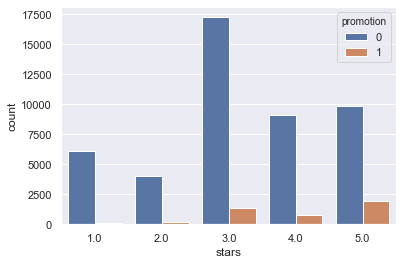

In [5]:
#sns.countplot(x='education',data=df,hue='promotion')
sns.countplot(x='stars',data=df,hue='promotion')

In [6]:
df['education'].fillna("Bachelor's",inplace=True)
df['stars'].fillna(3,inplace=True)

In [7]:
df.head()

,department,region,education,gender,recruitment_channel,training_num,age,stars,service_time,KPI,awards,avg_points,promotion
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [67]:
#obj_columns=[col for col in df.select_dtypes(include=['object'])]
#num_columns=['training_num', 'age', 'stars', 'service_time', 'KPI', 'awards', 'avg_points'] # excluded promotion in num_columns

## Data Visualisation

## 0.Heat_Map 
### checking the basic features having strong correlation with promotion
 we can see that stars,awards,avg_points,KPI are the only ones showing some correlation with promotion <br> and also service_time,age  &  stars_KPI show good correlation     (can_use_for_feature_engineering) <br> one weird observation is that more_num_of_trainings u undergo less promotion(may be a slow learner)

corr=df.corr()
sns.heatmap(corr,annot=True,linewidth=0.95,cmap="YlGnBu")

1.In DEPARTMENT it
seems like there are more promotions in sales and 0 promotions in R&D,Legal very less in Finance,HR <br>
therfore its better to have targe_encoding (choose value for each catgory based on promotion probab) for this

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

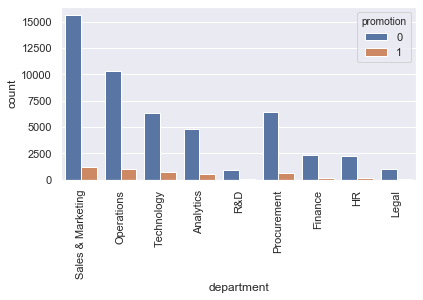

In [12]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.countplot(x='department',hue='promotion',data=df)
plt.xticks(rotation=90)

2.In REGION there are lot of categories so definitely label_encoder <br>
but it seems like region_1 doesnt seem to impact promotion(impartial_company) and also there are all ages,stars from all regions <br> so better to remove the column to avoid overfitting

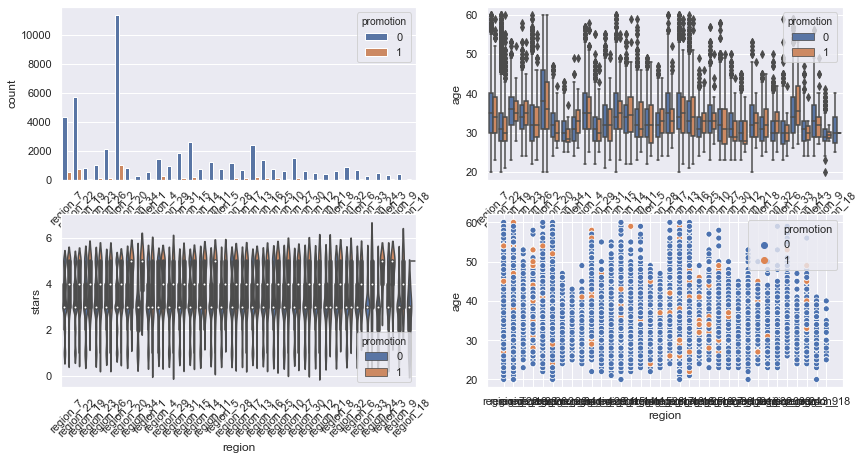

In [20]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.countplot(x='region',data=df,hue='promotion')
plt.xticks(rotation=45) 
plt.subplot(2,2,2)
sns.boxplot(x='region',y='age',data=df,hue='promotion')
plt.xticks(rotation=45) 
plt.subplot(2,2,3)
sns.violinplot(x='region',y='stars',data=df,hue='promotion')
plt.xticks(rotation=45) 
plt.subplot(2,2,4)
sns.scatterplot(x='region',y='age',data=df,hue='promotion')


3.In EDUCATION <br>
we can see that though no of promtions in B.Tech is more than Ms, but education doesn't reflect in avg_points or stars(strong_reason for promtions) <br> so the inbuilt reason for Btech having more promtions might be their young age <br> if at all we want to use it its better we use cat_boost/target Encoding for it

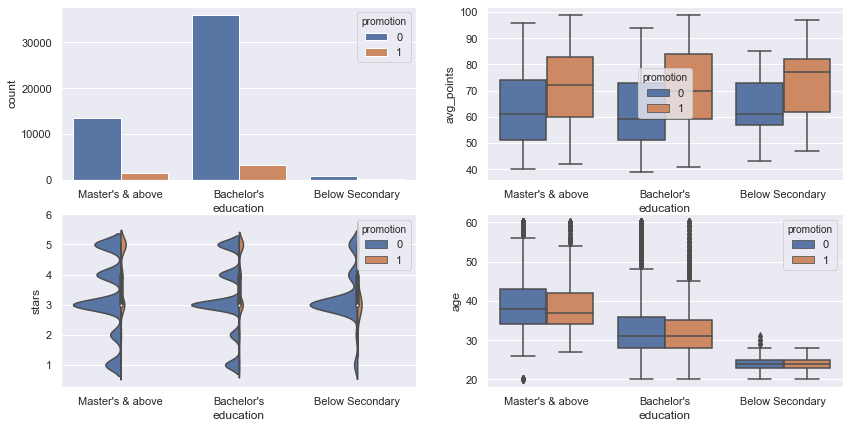

In [36]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.countplot(x='education',data=df,hue='promotion')
plt.subplot(2,2,2)
sns.boxplot(x='education',y='avg_points',data=df,hue='promotion')
plt.subplot(2,2,3)
sns.violinplot(x='education',y='stars',data=df,hue='promotion',scale='count',split=True)
plt.subplot(2,2,4)
sns.boxplot(x='education',y='age',hue='promotion',data=df)

4.In Gender <br>
we can see that male have more no of promotions than female (i.e) given a person has promotion max its a male <br>
we can do target_encoding for this to use a good feature

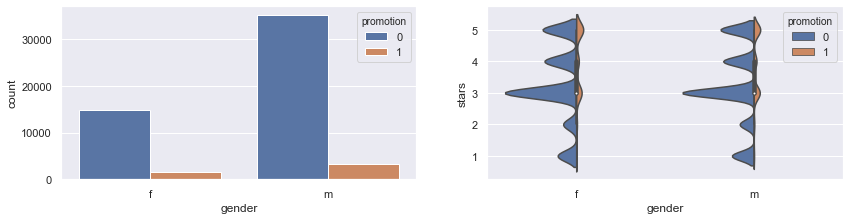

In [47]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.countplot(x='gender',data=df,hue='promotion')
plt.subplot(2,2,2)
sns.violinplot(x='gender',y='stars',data=df,hue='promotion',split=True,scale='count')

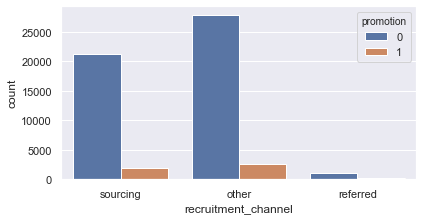

In [49]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.countplot(x='recruitment_channel',data=df,hue='promotion')

In [59]:
df.head()

,department,region,education,gender,recruitment_channel,training_num,age,stars,service_time,KPI,awards,avg_points,promotion
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


couldnt understand how to proceed in this case so better include and encode by caat_boost

### now that we completed categorical varibles visualtion, start continuous_var analysis by pairplot

### awards,KPI show strong correlation ,so no need of visualisation, they will be target_encoded:


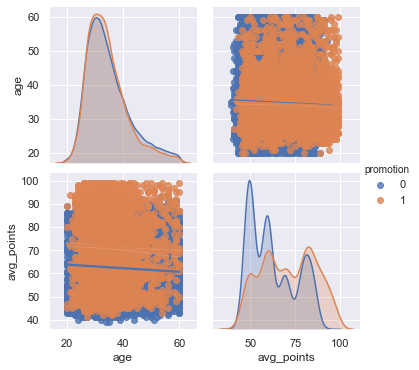

In [64]:
var=['age','avg_points']
sns.pairplot(vars=var,data=df,hue='promotion',kind='reg')

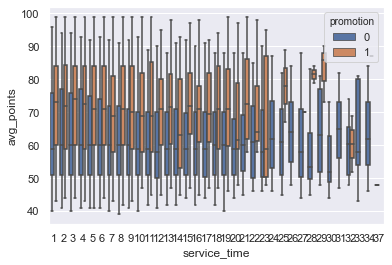

In [66]:
sns.boxplot(x='service_time',y='avg_points',hue='promotion',data=df)

people with low service_time have more promtions this shows company looking for employes with more service left and high points <br> only very few employees with more service_time are choosen for their experience

In [68]:
df.head()

,department,region,education,gender,recruitment_channel,training_num,age,stars,service_time,KPI,awards,avg_points,promotion
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


### Encoding :
### we will encode all the features as decided and drop the columns  not necessary

In [133]:
encode_cols=['department','region','education','gender','recruitment_channel','KPI','awards']
import category_encoders as ce
target_encoder=ce.TargetEncoder(cols=encode_cols)
encoded_df=target_encoder.fit_transform(df[encode_cols],df['promotion'])
df1=df.join(encoded_df,rsuffix='_n')

In [134]:
df1.drop(encode_cols,axis=1,inplace=True)

In [153]:
df1=df1[['department_n', 'education_n', 'gender_n',
        'KPI_n', 'awards_n', 'recruitment_channel_n','age', 'stars', 'avg_points',
       'promotion']] # removed 'region_n','training_num', 'service_time'

In [154]:
df1.head()  # COULD HAVE ENCODED TRAINING_NUM AND SERVICE_TIME BUT CHOOSING TO OPT OUT BECAUSE OF LARGE CORDINALITY

,department_n,education_n,gender_n,KPI_n,awards_n,recruitment_channel_n,age,stars,avg_points,promotion
0,0.072031,0.098559,0.089934,0.169094,0.076749,0.085013,35,5.0,49,0
1,0.090148,0.080096,0.083151,0.039587,0.076749,0.083952,30,5.0,60,0
2,0.072031,0.080096,0.083151,0.039587,0.076749,0.085013,34,3.0,50,0
3,0.072031,0.080096,0.083151,0.039587,0.076749,0.083952,39,1.0,50,0
4,0.107593,0.080096,0.083151,0.039587,0.076749,0.083952,45,3.0,73,0


## MODEL SELECTION AND VALIDATION

In [155]:
Y=df1.promotion
X=df1.drop(['promotion'],axis=1)

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# can use cross_validation easily for above
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import cross_val_score

In [157]:
log_reg=LogisticRegression(max_iter=1000)
cross_val_score(log_reg,X,Y)

array([0.91735085, 0.91570881, 0.91689473, 0.91761701, 0.91725208])

In [164]:
log_reg.fit(X,Y)
predictions=log_reg.predict(X)

In [166]:
from sklearn.metrics import f1_score
f1_score(predictions,Y)

0.1159082069233761

In [168]:
rndm_forest=RandomForestClassifier(n_estimators=1000)
cross_val_score(rndm_forest,X,Y)

array([0.92756796, 0.9258347 , 0.92501368, 0.92747012, 0.92610163])

In [109]:
#ada_boost_clf=AdaBoostClassifier(n_estimators=500,learning_rate=0.03)
#cross_val_score(ada_boost_clf,X,Y)

KeyboardInterrupt: 

In [113]:
#grad_clf=GradientBoostingClassifier(n_estimators=1500,learning_rate=0.03, n_iter_no_change=80)
#cross_val_score(grad_clf,X,Y)

In [114]:
# FOR LIGHT GBM USE train_valid
#from sklearn.model_selction impo

## Hyperparameter tuning

## Making predictions and Submitting

In [159]:
#test_data.head()
test_data.rename({
    'no_of_trainings':'training_num',
    'previous_year_rating':'stars',
    'length_of_service':'service_time',
    'KPIs_met >80%':'KPI',
    'awards_won?':'awards',
    'is_promoted':'promotion',
    'avg_training_score':'avg_points'
},axis=1,inplace=True)
test_data['education'].fillna("Bachelor's",inplace=True)
test_data['stars'].fillna(3,inplace=True)

In [160]:
encode_cols=['department','region','education','gender','recruitment_channel','KPI','awards']
encoded_test_data=target_encoder.transform(test_data[encode_cols])
test_data_1=test_data.join(encoded_test_data,rsuffix='_n')

In [161]:
test_data_1.drop(encode_cols,axis=1,inplace=True)
test_data_1=test_data_1[['department_n',  'education_n', 'gender_n',
       'recruitment_channel_n', 'KPI_n', 'awards_n', 'age', 'stars',  'avg_points']]
# removed 'region_n','training_num','service_time',

now the test_data_1 is prepared we will fit the model and make predictions

In [162]:
log_reg.fit(X,Y)
predictions=log_reg.predict(test_data_1)

In [163]:
submission=test_data[['employee_id']]
submission['is_promoted']=predictions
submission.to_csv('submission_2_log_reg.csv',index=False)

C:\Users\RAHUL\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
